In [1]:
#This is the functional Version. Use this for creating the report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#disable warnings
import warnings; warnings.simplefilter('ignore')

The source files for this script are SalesForce reports Interactions.Contacts.csv and Interactions.Opportunity.Term.csv. The source files have to be stored in a NON-GIT folder so that they will never be available to git hub. Whenever the source files are updated into box the old source files should be placed in a depreciated state in a different folder. This script therefore will always pull the most recent Salesforce report results.


In [3]:
#INT is the contact information for INTERACTIONS
INT=pd.read_csv('C:/Users/mjc341/Desktop/UMAN 1507 Monthly INQ summary Report/Interactions.Contacts1.csv',skipfooter=5,encoding='latin-1',engine ='python')
#INT=pd.read_csv('C:/Users/sxh706/Desktop/Interactions.by.Month/2018/August/Interactions.Contacts1.csv',skipfooter=5,encoding='latin-1',engine ='python')

Please Use a new dataframe name if you are going to break any code



In [4]:
#CON is the CONTACT TERM information
CON=pd.read_csv('C:/Users/mjc341/Desktop/UMAN 1507 Monthly INQ summary Report/Interactions.Opportunity.Term.csv',skipfooter=5,encoding='latin-1',engine ='python')
#CON=pd.read_csv('C:/Users/sxh706/Desktop/Interactions.by.Month/2018/August/Interactions.Opportunity.Term.csv',skipfooter=5,encoding='latin-1',engine ='python')

In [5]:
len(INT)

1321215

In [6]:
len(CON)

818555

In [7]:
#INT.info()

In [8]:
INT.columns

Index(['Contact: Contact ID (18-digit)', 'Interaction: Interaction Name',
       'Admit Type', 'Contact: EMPLID', 'Contact: First Name',
       'Contact: Middle Name', 'Contact: Last Name', 'Contact: Ethnic Group',
       'Contact: Ethnicity', 'Contact: Gender', 'Term', 'Lead Source',
       'Interaction: Created Date', 'Contact: Mailing Street',
       'Contact: Mailing City', 'Contact: Mailing State/Province',
       'Contact: Mailing Zip/Postal Code', 'Contact: Mailing Country',
       'Contact: Other City', 'Contact: Other State/Province',
       'Contact: Other Zip/Postal Code', 'Contact: Other Country',
       'Contact: Market Segment Code', 'Contact: Market Segment'],
      dtype='object')

In [9]:
CON.columns

Index(['Contact ID (18-digit)', 'Full Name', 'Opportunity Name',
       'Term: Term Name', 'Opportunity Record Type', 'Inquiry', 'Inquiry Date',
       'Opportunity ID (18-digit)', 'Empl ID', 'Application Number'],
      dtype='object')

In [10]:
#CON.info()

In [11]:
#remove columns with identifing info
CON = CON.drop(columns =['Full Name'])

In [12]:
#remove columns with identifing info
INT = INT.drop(columns= ['Contact: First Name', 'Contact: Middle Name',
       'Contact: Last Name'])

In [13]:
#changed the name of columns using a dictionary
INT = INT.rename(columns ={'Contact: Contact ID (18-digit)':'Contact_ID','Interaction: Interaction Name':'Int_Name',
       'Admit Type':'Admit_Type','Contact: EMPLID': 'EMPLID','Contact: Ethnic Group': 'Ethnic_Group', 'Contact: Ethnicity':'Ethnicity',
       'Contact: Gender':'Gender', 'Term':'Term', 'Lead Source':'Lead_Source', 'Interaction: Created Date':'Create_Date',
       'Contact: Mailing Street':'Mailing_Street', 'Contact: Mailing City':'Mailing_City',
       'Contact: Mailing State/Province':'Mailing_State', 'Contact: Mailing Zip/Postal Code':'Mailing_Postal',
       'Contact: Mailing Country':'Mailing_Country', 'Contact: Other City':'Other_City',
       'Contact: Other State/Province':'Other_State', 'Contact: Other Zip/Postal Code':'Other_Postal',
       'Contact: Other Country':'Mailing_Country', 'Contact: Market Segment Code':'Market_Segment_Code',
       'Contact: Market Segment':'Market_Segment'},inplace =False)

In [14]:
#changed the name of columns
CON = CON.rename(columns={  'Contact ID (18-digit)':'Contact_ID', 'Opportunity Name':'OppName', 
       'Term: Term Name':'CONTerm', 'Opportunity Record Type':'Record_Type', 'Inquiry':'Inquiry', 'Inquiry Date':'Inquiry_Date',
       'Opportunity ID (18-digit)':'Opp_ID', 'Empl ID':'EMPL', 'Application Number':'App_Number'})

In [15]:
#Sort INT by Contact_ID and Interaction Names
INT = INT.sort_values(by = ['Contact_ID','Int_Name'])

In [16]:
#Sort CON by Contact_ID and Opportunity Name
CON = CON.sort_values(by = ['Contact_ID','Inquiry_Date'])

In [17]:
#Dropping the duplicates to then merge later
CON=CON.drop_duplicates(['Contact_ID'], keep='last')

In [18]:
#Inner Join
INNER_INT = pd.merge(left = INT, right = CON, left_on= 'Contact_ID', right_on = 'Contact_ID')

In [19]:
len(INNER_INT)

1090116

INT has been MERGED with CON on Contact_ID this will allow us to find one TERM for each contact ID

In [20]:
INNER_INT.head(1)

,Contact_ID,Int_Name,Admit_Type,EMPLID,Ethnic_Group,Ethnicity,Gender,Term,Lead_Source,Create_Date,...,Market_Segment_Code,Market_Segment,OppName,CONTerm,Record_Type,Inquiry,Inquiry_Date,Opp_ID,EMPL,App_Number
0,0031500001d4Si8AAE,20160320-0100599,New Student,NaN,NaN,NaN,Female,Fall 2015,Purchased List,1/4/2013,...,NaN,NaN,fernandez - Fall 2017,Fall 2017,UGrad Inquiry,1.0,3/21/2016,0061500000T62QTAAZ,NaN,NaN


In [21]:
# Create a datetime variable from Create_Date this operation takes up to 3 min
#INT['Create_Date']= pd.to_datetime(INT.Create_Date)
INNER_INT['Create_Date']= pd.to_datetime(INNER_INT.Create_Date)

In [22]:
#INT.info()

In [23]:
#find earliest create date
#INT['Create_Date'].min()
INNER_INT['Create_Date'].min()

Timestamp('2001-08-06 00:00:00')

Here we will insert the lambda function to extract the YEAR and MONTH from the new datetime type so we can filter on YEAR and groupby MONTH also add M col that can be dictionaried to Names of MONTHS instead of numbers. Question can we format the month names at the conversion?

In [24]:
#INT.loc[:,'YEAR'] =INT['Create_Date'].apply(lambda x: "%d" % (x.year))
INNER_INT.loc[:,'YEAR'] =INNER_INT['Create_Date'].apply(lambda x: "%d" % (x.year))

In [25]:
#INT.loc[:,'MONTH'] = INT['Create_Date'].apply(lambda x: "%d" % (x.month))
INNER_INT.loc[:,'MONTH'] = INNER_INT['Create_Date'].apply(lambda x: "%d" % (x.month))

In [26]:
INNER_INT.head(1)

,Contact_ID,Int_Name,Admit_Type,EMPLID,Ethnic_Group,Ethnicity,Gender,Term,Lead_Source,Create_Date,...,OppName,CONTerm,Record_Type,Inquiry,Inquiry_Date,Opp_ID,EMPL,App_Number,YEAR,MONTH
0,0031500001d4Si8AAE,20160320-0100599,New Student,NaN,NaN,NaN,Female,Fall 2015,Purchased List,2013-01-04,...,fernandez - Fall 2017,Fall 2017,UGrad Inquiry,1.0,3/21/2016,0061500000T62QTAAZ,NaN,NaN,2013,1


In [27]:
# filter on term for 2017,2018,2019,2020
#TERM2017 = INT.loc[(INT.Term == 'Fall 2017')]
#TERM2018 = INT.loc[(INT.Term == 'Fall 2018')]
#TERM2019 = INT.loc[(INT.Term == 'Fall 2019')]
#TERM2020 = INT.loc[(INT.Term == 'Fall 2020')]
TERM2017 = INNER_INT.loc[(INNER_INT.CONTerm == 'Fall 2017')]
TERM2018 = INNER_INT.loc[(INNER_INT.CONTerm == 'Fall 2018')]
TERM2019 = INNER_INT.loc[(INNER_INT.CONTerm == 'Fall 2019')]
TERM2020 = INNER_INT.loc[(INNER_INT.CONTerm == 'Fall 2020')]

In [28]:
len(TERM2017)

181852

In [29]:
len(TERM2018)

142061

In [30]:
len(TERM2019)

85884

In [31]:
len(TERM2020)

27579

In [32]:
#filter on YEAR for  2016,2017,2018,2019
#INQ2017 df is inquiries made in 2016 for 2017 TERM
INQ2017 = TERM2017[TERM2017['YEAR'] == '2016']
INQ2018 = TERM2018[TERM2018['YEAR'] == '2017']
INQ2019 = TERM2019[TERM2019['YEAR'] == '2018']
INQ2020 = TERM2020[TERM2020['YEAR'] == '2018']
INQ2017year2 = TERM2017[TERM2017['YEAR'] == '2017']
INQ2018year2 = TERM2018[TERM2018['YEAR'] == '2017']
INQ2019year2 = TERM2019[TERM2019['YEAR'] == '2018']

In [33]:
len(INQ2017)

97634

In [34]:
len(INQ2018)

82881

In [35]:
len(INQ2019)

57691

In [36]:
len(INQ2020)

21159

In [37]:
#show head of INQ2017 same for 2017,2018,2019
INQ2017.head(1)

,Contact_ID,Int_Name,Admit_Type,EMPLID,Ethnic_Group,Ethnicity,Gender,Term,Lead_Source,Create_Date,...,OppName,CONTerm,Record_Type,Inquiry,Inquiry_Date,Opp_ID,EMPL,App_Number,YEAR,MONTH
29,0031500001d4SiKAAU,20160320-0928828,New Student,NaN,NaN,Hispanic,Female,Fall 2017,Submitted Test Score,2016-02-22,...,Peters - Fall 2017,Fall 2017,UGrad Inquiry,1.0,3/21/2016,0061500000T66I6AAJ,NaN,NaN,2016,2


In [38]:
INQ2017.columns

Index(['Contact_ID', 'Int_Name', 'Admit_Type', 'EMPLID', 'Ethnic_Group',
       'Ethnicity', 'Gender', 'Term', 'Lead_Source', 'Create_Date',
       'Mailing_Street', 'Mailing_City', 'Mailing_State', 'Mailing_Postal',
       'Mailing_Country', 'Other_City', 'Other_State', 'Other_Postal',
       'Mailing_Country', 'Market_Segment_Code', 'Market_Segment', 'OppName',
       'CONTerm', 'Record_Type', 'Inquiry', 'Inquiry_Date', 'Opp_ID', 'EMPL',
       'App_Number', 'YEAR', 'MONTH'],
      dtype='object')

In [39]:
#confirm that filtered data is a datafram
type(INQ2017)

pandas.core.frame.DataFrame

In [40]:
#pd.show_versions()

In [41]:
#get count by month of each term
INQ2017.Create_Date.dt.month.value_counts().sort_index()

1      3821
2      4993
3      1691
4      1424
5      2523
6     12373
7     12590
8      2357
9      7385
10    17303
11    16820
12    14354
Name: Create_Date, dtype: int64

In [42]:
INQ2018.Create_Date.dt.month.value_counts().sort_index()

1      1854
2      3898
3      3480
4      3432
5     10401
6      6779
7      3698
8      4791
9      5687
10    19397
11    14710
12     4754
Name: Create_Date, dtype: int64

In [43]:
INQ2019.Create_Date.dt.month.value_counts().sort_index()

1     2299
2     2689
3    10049
4    11755
5     6931
6    10916
7     6662
8     1863
9     4527
Name: Create_Date, dtype: int64

In [44]:
#this creates a list for 2018 dates but will eventually have to be changed to 2019 dates
INQ2020.Create_Date.dt.month.value_counts().sort_index()

1      557
2      625
3    12010
4     1966
5     1352
6      652
7     3294
8      384
9      319
Name: Create_Date, dtype: int64

In [45]:
#create a timestamp to get values from the FAll 2018 term that are prior to Jan 1 2017
#also created a timestamp for february and august values of the subsequent year of each opp term
#a current timestamp was also created as well as the Y-o-Y time stamps (12-15).
tsprior = pd.Timestamp('1/1/2016')
tsprior2 = pd.Timestamp('1/1/2017')
tsprior3 = pd.Timestamp('1/1/2018')
tsprior4 = pd.Timestamp('1/1/2019')
tsprior5 = pd.Timestamp('2/1/2017')
tsprior6 = pd.Timestamp('2/1/2018')
tsprior7 = pd.Timestamp('2/1/2019')
tsprior8 = pd.Timestamp('8/1/2017')
tsprior9 = pd.Timestamp('8/1/2018')
tsprior10 = pd.Timestamp('9/1/2019')
tsprior11 = pd.Timestamp('9/1/2018')
tsprior12 = pd.Timestamp('9/1/2017')
tsprior13 = pd.Timestamp('9/1/2016')

In [46]:
tsprior

Timestamp('2016-01-01 00:00:00')

In [47]:
B4JAN16 = TERM2017.loc[TERM2017.Create_Date < tsprior,:]
B4JAN17 = TERM2018.loc[TERM2018.Create_Date < tsprior2,:]
B4JAN18 = TERM2019.loc[TERM2019.Create_Date < tsprior3,:]
B4JAN19 = TERM2020.loc[TERM2020.Create_Date < tsprior3,:]
B4FEB17 = TERM2017.loc[TERM2017.Create_Date < tsprior5,:]
B4FEB18 = TERM2018.loc[TERM2018.Create_Date < tsprior6,:]
B4FEB19 = TERM2019.loc[TERM2019.Create_Date < tsprior7,:]
B4FEB20 = TERM2020.loc[TERM2020.Create_Date < tsprior7,:]
B4AUG17 = TERM2017.loc[TERM2017.Create_Date < tsprior8,:]
B4AUG18 = TERM2018.loc[TERM2018.Create_Date < tsprior9,:]
TOTAL2017 = TERM2017.loc[TERM2017.Create_Date < tsprior10,:]
TOTAL2018 = TERM2018.loc[TERM2018.Create_Date < tsprior10,:]
TOTAL2019 = TERM2019.loc[TERM2019.Create_Date < tsprior10,:]
TOTAL2020 = TERM2020.loc[TERM2020.Create_Date < tsprior10,:]
YoY2017 = TERM2017.loc[TERM2017.Create_Date < tsprior13,:]
YoY2018 = TERM2018.loc[TERM2018.Create_Date < tsprior12,:]
YoY2019 = TERM2019.loc[TERM2019.Create_Date < tsprior11,:]

In [48]:
len(B4JAN16)

61451

In [49]:
len(B4JAN17)

38758

In [50]:
len(B4JAN18)

28193

In [51]:
len(B4JAN19)

6420

In [52]:
#test the counts
B4JAN16['Contact_ID'].value_counts().sum()
#B4JAN17['Contact_ID'].value_counts().sum()
#B4JAN18['Contact_ID'].value_counts().sum()
#B4JAN19['Contact_ID'].value_counts().sum()
#B4FEB17['Contact_ID'].value_counts().sum()
#B4FEB18['Contact_ID'].value_counts().sum()
#B4FEB19['Contact_ID'].value_counts().sum()
#B4FEB20['Contact_ID'].value_counts().sum()
#B4AUG17['Contact_ID'].value_counts().sum()
#B4AUG18['Contact_ID'].value_counts().sum()
#TOTAL2017['Contact_ID'].value_counts().sum()
#TOTAL2018['Contact_ID'].value_counts().sum()
#TOTAL2019['Contact_ID'].value_counts().sum()
#TOTAL2020['Contact_ID'].value_counts().sum()

61451

In [53]:
#B4JAN19['Contact_ID'].value_counts().sum()

In [54]:
R17 = INQ2017.Create_Date.dt.month.value_counts().sort_index()
R18 = INQ2018.Create_Date.dt.month.value_counts().sort_index()
R19 = INQ2019.Create_Date.dt.month.value_counts().sort_index()
R20 = INQ2020.Create_Date.dt.month.value_counts().sort_index()

In [55]:
R17df = pd.DataFrame([R17]).T
R18df = pd.DataFrame([R18]).T
R19df = pd.DataFrame([R19]).T
R20df = pd.DataFrame([R20]).T

In [56]:
#R16df.head()

In [57]:
a =R17df.rename({'Create_Date': 'Count-2016'}, axis = 'columns')
#R16df.rename({'Create_Date': 'Count-2016'}, axis = 'columns')

In [58]:
b = R18df.rename({'Create_Date': 'Count-2017'}, axis = 'columns')
#R17df.rename({'Create_Date': 'Count-2017'}, axis = 'columns')

In [59]:
#R18df.rename({'Create_Date': 'Count-2018'}, axis = 'columns')
c = R19df.rename({'Create_Date': 'Count-2018'}, axis = 'columns')

In [60]:
d = R20df.rename({'Create_Date': 'Count-2018'}, axis = 'columns')

In [61]:
j = pd.concat([a, b], axis=1, join_axes=[a.index])
    

In [62]:
#j.head(1)

In [63]:
k = pd.concat([j, c], axis=1, join_axes=[a.index])

In [64]:
k2 = pd.concat([k, d], axis=1, join_axes=[a.index])

In [65]:
k2.head()

,Count-2016,Count-2017,Count-2018,Count-2018
1,3821,1854,2299.0,557.0
2,4993,3898,2689.0,625.0
3,1691,3480,10049.0,12010.0
4,1424,3432,11755.0,1966.0
5,2523,10401,6931.0,1352.0


In [66]:
#k.head()

In [67]:
type(k2)

pandas.core.frame.DataFrame

In [68]:
k2.dtypes

Count-2016      int64
Count-2017      int64
Count-2018    float64
Count-2018    float64
dtype: object

In [69]:
k =  k2.replace(np.nan,0)

In [70]:
k['Count-2018'] = k['Count-2018'].astype(int)
k

,Count-2016,Count-2017,Count-2018,Count-2018
1,3821,1854,2299,557
2,4993,3898,2689,625
3,1691,3480,10049,12010
4,1424,3432,11755,1966
5,2523,10401,6931,1352
6,12373,6779,10916,652
7,12590,3698,6662,3294
8,2357,4791,1863,384
9,7385,5687,4527,319
10,17303,19397,0,0


In [71]:
#k.dtypes

In [72]:
k.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [73]:
# create  a dictionary to map the month values
dict = {1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'}

In [74]:
#map the dictionary to the new col on index
k ['MONTH'] = k.index.map(dict)

In [75]:
k

,Count-2016,Count-2017,Count-2018,Count-2018,MONTH
1,3821,1854,2299,557,JAN
2,4993,3898,2689,625,FEB
3,1691,3480,10049,12010,MAR
4,1424,3432,11755,1966,APR
5,2523,10401,6931,1352,MAY
6,12373,6779,10916,652,JUN
7,12590,3698,6662,3294,JUL
8,2357,4791,1863,384,AUG
9,7385,5687,4527,319,SEP
10,17303,19397,0,0,OCT


In [76]:
#change the name of the df and rearrange the cols
INQbyMONTH = k[['MONTH','Count-2016','Count-2017','Count-2018']]

In [77]:
#this is the result
INQbyMONTH

,MONTH,Count-2016,Count-2017,Count-2018,Count-2018
1,JAN,3821,1854,2299,557
2,FEB,4993,3898,2689,625
3,MAR,1691,3480,10049,12010
4,APR,1424,3432,11755,1966
5,MAY,2523,10401,6931,1352
6,JUN,12373,6779,10916,652
7,JUL,12590,3698,6662,3294
8,AUG,2357,4791,1863,384
9,SEP,7385,5687,4527,319
10,OCT,17303,19397,0,0


In [78]:
#it is a df
type(INQbyMONTH)

pandas.core.frame.DataFrame

In [79]:
#before January values
a = B4JAN16['Contact_ID'].value_counts().sum()
b = B4JAN17['Contact_ID'].value_counts().sum()
c = B4JAN18['Contact_ID'].value_counts().sum()
d = B4JAN19['Contact_ID'].value_counts().sum()

In [80]:
PRIOR = pd.DataFrame({'Prior to Jan 2016': a , 'Prior to Jan 2017': b , 'Prior to Jan 2018': c, 'Prior to Jan 2018.2': d},index = [0])

In [81]:
PRIOR

,Prior to Jan 2016,Prior to Jan 2017,Prior to Jan 2018,Prior to Jan 2018.2
0,61451,38758,28193,6420


In [82]:
#before February values
e = B4FEB17['Contact_ID'].value_counts().sum()
f = B4FEB18['Contact_ID'].value_counts().sum()

In [83]:
PRIOR2 = pd.DataFrame({'Prior to Feb 2017': e , 'Prior to Feb 2018': f },index = [0])

In [84]:
PRIOR2

,Prior to Feb 2017,Prior to Feb 2018
0,167527,130268


In [85]:
#before August values
g = B4AUG17['Contact_ID'].value_counts().sum()
h = B4AUG18['Contact_ID'].value_counts().sum()

In [86]:
PRIOR3 = pd.DataFrame({'Prior to Aug 2017': g , 'Prior to Aug 2018': h },index = [0])

In [87]:
PRIOR3

,Prior to Aug 2017,Prior to Aug 2018
0,180154,141838


In [88]:
#current values
i = TOTAL2017['Contact_ID'].value_counts().sum()
j = TOTAL2018['Contact_ID'].value_counts().sum()
k = TOTAL2019['Contact_ID'].value_counts().sum()
l = TOTAL2020['Contact_ID'].value_counts().sum()

In [89]:
TOTAL4 = pd.DataFrame({'Total 2017': i , 'Total 2018': j, 'Total 2019': k, 'Total 2020': l},index = [0])

In [90]:
TOTAL4

,Total 2017,Total 2018,Total 2019,Total 2020
0,181852,142061,85884,27579


In [91]:
#create a df for the y-o-y comparison of 2017, 2018, and 2019. #redundant???
#tspriorFEB17 = pd.Timestamp('2/1/2017')
#tspriorFEB18 = pd.Timestamp ('2/1/2018')
#tspriorFEB19 = pd.Timestamp('2/1/2019')
#tspriorAUG17 = pd.Timestamp('8/1/2017')
#tspriorAUG18 = pd.Timestamp ('8/1/2018')
#tspriorAUG19 = pd.Timestamp('8/1/2019')
#tsJUN312017 = pd.Timestamp('6/30/2017')
#tsJUN312018 = pd.Timestamp('6/30/2018')
#tsJUN312019 = pd.Timestamp('6/30/2019')

In [92]:
#LeadSource Counts for AdmitTerm 2017 that occured in 2016
LEAD17 = YoY2017.pivot_table(index=['Lead_Source'],values =['Contact_ID'],aggfunc =len)
LEAD17.rename(index= str, columns={'Contact_ID':'2017'},inplace =True)
LEAD17

,2017
Lead_Source,
Admission Conversion,33
College Fair,10052
College Visit,10
Education Fair,10
Email,204
Event Registration,9186
Financial Aid,129
Group Tour,4
High School Visit,3833


In [93]:
#LeadSource Counts for AdmitTerm 2018 that occured in 2017
LEAD18 = YoY2018.pivot_table(index=['Lead_Source'],values =['Contact_ID'],aggfunc =len)
LEAD18.rename(index= str, columns={'Contact_ID':'2018'},inplace =True)
LEAD18

,2018
Lead_Source,
Admission Conversion,83
College Fair,10261
College Visit,29
Education Fair,7
Email,85
Event Registration,10121
Financial Aid,28
Group Tour,399
High School Visit,3422


In [94]:
#LeadSource Counts for AdmitTerm 2019 that occured in 2018
LEAD19 = YoY2019.pivot_table(index=['Lead_Source'],values =['Contact_ID'],aggfunc =len)
LEAD19.rename(index= str, columns={'Contact_ID':'2019'},inplace =True)
LEAD19

,2019
Lead_Source,
Admission Conversion,2
College Fair,10001
College Visit,12
Education Fair,12
Email,31
Event Registration,11822
Financial Aid,2
Group Tour,462
High School Visit,2730


In [95]:
LEAD1 = pd.concat([LEAD17, LEAD18], axis=1, join_axes=[LEAD18.index])
LEAD1

,2017,2018
Lead_Source,,
Admission Conversion,33.0,83
College Fair,10052.0,10261
College Visit,10.0,29
Education Fair,10.0,7
Email,204.0,85
Event Registration,9186.0,10121
Financial Aid,129.0,28
Group Tour,4.0,399
High School Visit,3833.0,3422


In [96]:
Lead2 = pd.concat([LEAD1, LEAD19], axis=1, join_axes=[LEAD18.index])
Lead2

,2017,2018,2019
Lead_Source,,,
Admission Conversion,33.0,83,2.0
College Fair,10052.0,10261,10001.0
College Visit,10.0,29,12.0
Education Fair,10.0,7,12.0
Email,204.0,85,31.0
Event Registration,9186.0,10121,11822.0
Financial Aid,129.0,28,2.0
Group Tour,4.0,399,462.0
High School Visit,3833.0,3422,2730.0


In [97]:
LEAD = Lead2.fillna(0)
LEAD['2018'] = LEAD['2018'].astype(int)
LEAD['2019'] = LEAD['2019'].astype(int)
LEAD

,2017,2018,2019
Lead_Source,,,
Admission Conversion,33.0,83,2
College Fair,10052.0,10261,10001
College Visit,10.0,29,12
Education Fair,10.0,7,12
Email,204.0,85,31
Event Registration,9186.0,10121,11822
Financial Aid,129.0,28,2
Group Tour,4.0,399,462
High School Visit,3833.0,3422,2730


In [98]:
#Count all Inq for the 2017 Admit term that occured before August of 2017  #Redundant???
#B4AUG17 = TERM2017.loc[TERM2017.Create_Date <= tspriorAUG17,:]
#len(B4AUG17)

In [99]:
#Count all Inq for the 2018 Admit term that occured before August of 2018 #Redundant???
#B4AUG18 = TERM2018.loc[TERM2018.Create_Date <= tspriorAUG18,:]
#len(B4AUG18)

In [100]:
# create the path where the results willbe sent
path_final = r'C:/Users/mjc341/Desktop/EMSA-GIT/COLAB'
#path_final = r'C:/Users/sxh706/Desktop'

In [101]:
#path_final

In [102]:
writer = pd.ExcelWriter(path_final + '/' + 'SalesForceByMonth1' + '.xlsx')
INQbyMONTH.to_excel(writer,'Results')
PRIOR.to_excel(writer, 'PRIOR')
PRIOR2.to_excel(writer, 'PRIOR2')
PRIOR3.to_excel(writer, 'PRIOR3')
TOTAL4.to_excel(writer, 'TOTAL4')

LEAD.to_excel(writer,'LEAD')
workbook = writer.book
worksheet = writer.sheets['Results'] 
worksheet2 = writer.sheets ['PRIOR']
worksheet3 = writer.sheets ['PRIOR2']
worksheet4 = writer.sheets ['PRIOR3']
worksheet5 = writer.sheets ['TOTAL4']
worksheet6 = writer.sheets ['LEAD']

format1 = workbook.add_format({'num_format': '#,##', 'bold': True, 'border': '1'})
format2 = workbook.add_format({'num_format': '##,###', 'border': '1','bg_color':'#FFC7CE'})
format3 = workbook.add_format({'border': '1','bg_color':'#DAF7A6'})
format4 = workbook.add_format({'border': '1','bg_color':'#DAF7A6'})
#added bkground color so we can show different years

# Note: It isn't possible to format any cells that already have a format such
# as the index or headers or any cells that contain dates or datetimes.

worksheet.set_column('A:A', 10)
worksheet.set_column('B:E', 12)
worksheet.set_row(1, None, format2)
worksheet.set_row(2, None, format2)
worksheet.set_row(3, None, format2)
worksheet.set_row(4, None, format2)
worksheet.set_row(5, None, format2)
worksheet.set_row(6, None, format2)
worksheet.set_row(7, None, format2)
worksheet.set_row(8, None, format2)
worksheet.set_row(9, None, format2)
worksheet.set_row(10, None, format2)
worksheet.set_row(11, None, format2)
worksheet.set_row(12, None, format2)

worksheet2.set_column('A:A', 10)
worksheet2.set_column('B:E', 18)
worksheet2.set_row(1, None, format3)
worksheet2.set_row(2, None, format4)

worksheet3.set_column('A:A', 10)
worksheet3.set_column('B:C', 18)
worksheet3.set_row(1, None, format3)
worksheet3.set_row(2, None, format4)

worksheet4.set_column('A:A', 10)
worksheet4.set_column('B:C', 18)
worksheet4.set_row(1, None, format3)
worksheet4.set_row(2, None, format4)

worksheet5.set_column('A:A', 10)
worksheet5.set_column('B:E', 18)
worksheet5.set_row(1, None, format3)
worksheet5.set_row(2, None, format4)

worksheet6.set_column('A:A', 10)
worksheet6.set_column('B:E', 18)
worksheet6.set_row(1, None, format3)
worksheet6.set_row(2, None, format4)
worksheet6.set_row(3, None, format4)
worksheet6.set_row(4, None, format4)
worksheet6.set_row(5, None, format4)
worksheet6.set_row(6, None, format4)
worksheet6.set_row(7, None, format4)
worksheet6.set_row(8, None, format4)
worksheet6.set_row(9, None, format4)
worksheet6.set_row(10, None, format4)
worksheet6.set_row(11, None, format4)
worksheet6.set_row(12, None, format4)
worksheet6.set_row(13, None, format4)
worksheet6.set_row(14, None, format4)
worksheet6.set_row(15, None, format4)
worksheet6.set_row(16, None, format4)
worksheet6.set_row(17, None, format4)
worksheet6.set_row(18, None, format4)
worksheet6.set_row(19, None, format4)
worksheet6.set_row(20, None, format4)


#dont write until you check the code then remove the # below
#writer.save()

In [103]:
len(INNER_INT)

1090116

In [104]:
INNER_INT.head(1)

,Contact_ID,Int_Name,Admit_Type,EMPLID,Ethnic_Group,Ethnicity,Gender,Term,Lead_Source,Create_Date,...,OppName,CONTerm,Record_Type,Inquiry,Inquiry_Date,Opp_ID,EMPL,App_Number,YEAR,MONTH
0,0031500001d4Si8AAE,20160320-0100599,New Student,NaN,NaN,NaN,Female,Fall 2015,Purchased List,2013-01-04,...,fernandez - Fall 2017,Fall 2017,UGrad Inquiry,1.0,3/21/2016,0061500000T62QTAAZ,NaN,NaN,2013,1


In [105]:
# do i need this step
# INNER_INT['ETH'] = ''

In [106]:
INNER_INT['Ethnic_Group'].value_counts(dropna=False)

NaN         756459
WHITE       223879
ASIAN        37704
BLACK        33880
NSPEC        15883
SOAMER        5091
PUERTOR       3577
CENTAMER      3076
MEXAMER       2997
CUBAN         2986
HISPA         2544
NHISP          706
PACIF          551
AMIND          406
SPANISH        377
Name: Ethnic_Group, dtype: int64

In [107]:
#INNER_INT['ETH'] = np.where(INNER_INT['Ethnic_Group'] == (NaN), INNER_INT['Ethnicity'], INNER_INT['Ethnic_Group'])

In [108]:
len(INNER_INT)

1090116

In [109]:
INNER_INT2 = INNER_INT.loc(axis=0)[:]

In [110]:
len(INNER_INT2)

1090116

In [111]:
INNER_INT2.Contact_ID.duplicated().sum()

383510

In [112]:
INNER_INT.Contact_ID.duplicated().sum()

383510

In [113]:
#ETH_DF = INNER_INT2.loc(axis=0)[:,'Ethnic_Group','Ethnicity']

In [114]:
N = list(range(0,1090116))

In [115]:
INNER_INT['NEW'] = N

In [116]:
INNER_INT2['NEW'] = N

In [117]:
INNER_INT2.head(3)

,Contact_ID,Int_Name,Admit_Type,EMPLID,Ethnic_Group,Ethnicity,Gender,Term,Lead_Source,Create_Date,...,CONTerm,Record_Type,Inquiry,Inquiry_Date,Opp_ID,EMPL,App_Number,YEAR,MONTH,NEW
0,0031500001d4Si8AAE,20160320-0100599,New Student,NaN,NaN,NaN,Female,Fall 2015,Purchased List,2013-01-04,...,Fall 2017,UGrad Inquiry,1.0,3/21/2016,0061500000T62QTAAZ,NaN,NaN,2013,1,0
1,0031500001d4Si8AAE,20160320-1020622,New Student,NaN,NaN,NaN,Female,Fall 2017,College Fair,2015-11-19,...,Fall 2017,UGrad Inquiry,1.0,3/21/2016,0061500000T62QTAAZ,NaN,NaN,2015,11,1
2,0031500001d4Si9AAE,20160320-0159926,New Student,NaN,NaN,Hispanic,Female,Fall 2016,UGrad Campus Visit Check-in Form,2013-03-28,...,Fall 2016,UGrad Inquiry,1.0,3/21/2016,0061500000T5bWTAAZ,NaN,NaN,2013,3,2


In [118]:
INNER_INT2['NEW'] = INNER_INT2['NEW'].astype(str)

In [119]:
INNER_INT2['NEW'].dtype

dtype('O')

In [120]:
INNER_INT2['NEW_INDEX'] = INNER_INT2['Contact_ID']+INNER_INT2['NEW']

In [121]:
INNER_INT2['NEW_INDEX'].dtype

dtype('O')

In [122]:
INNER_INT2.NEW_INDEX.duplicated().sum()

0

In [123]:
INNER_INT2.set_index(['NEW_INDEX'], inplace=True)

In [124]:
INNER_INT2.shape

(1090116, 32)

In [125]:
# THIS is the code that is not working
#INNER_INT2['Ethnic_Group'] = INNER_INT2['Ethnic_Group'].fillna(value = 'UNK',inplace=True)

In [126]:
INNER_INT2.head()

,Contact_ID,Int_Name,Admit_Type,EMPLID,Ethnic_Group,Ethnicity,Gender,Term,Lead_Source,Create_Date,...,CONTerm,Record_Type,Inquiry,Inquiry_Date,Opp_ID,EMPL,App_Number,YEAR,MONTH,NEW
NEW_INDEX,,,,,,,,,,,,,,,,,,,,,
0031500001d4Si8AAE0,0031500001d4Si8AAE,20160320-0100599,New Student,NaN,NaN,NaN,Female,Fall 2015,Purchased List,2013-01-04,...,Fall 2017,UGrad Inquiry,1.0,3/21/2016,0061500000T62QTAAZ,NaN,NaN,2013,1,0
0031500001d4Si8AAE1,0031500001d4Si8AAE,20160320-1020622,New Student,NaN,NaN,NaN,Female,Fall 2017,College Fair,2015-11-19,...,Fall 2017,UGrad Inquiry,1.0,3/21/2016,0061500000T62QTAAZ,NaN,NaN,2015,11,1
0031500001d4Si9AAE2,0031500001d4Si9AAE,20160320-0159926,New Student,NaN,NaN,Hispanic,Female,Fall 2016,UGrad Campus Visit Check-in Form,2013-03-28,...,Fall 2016,UGrad Inquiry,1.0,3/21/2016,0061500000T5bWTAAZ,NaN,NaN,2013,3,2
0031500001d4Si9AAE3,0031500001d4Si9AAE,20160320-0835174,New Student,NaN,NaN,Hispanic,Female,Fall 2017,Purchased List,2015-10-26,...,Fall 2016,UGrad Inquiry,1.0,3/21/2016,0061500000T5bWTAAZ,NaN,NaN,2015,10,3
0031500001d4SiAAAU4,0031500001d4SiAAAU,20160320-0162751,New Student,NaN,NaN,NaN,Male,Fall 2015,UGrad Campus Visit Check-in Form,2013-06-27,...,Fall 2017,UGrad Inquiry,1.0,3/21/2016,0061500000T64znAAB,NaN,NaN,2013,6,4


In [127]:
#INNER_INT2.shape

In [128]:
INNER_INT2['Ethnic_Group'].value_counts(dropna=False)

NaN         756459
WHITE       223879
ASIAN        37704
BLACK        33880
NSPEC        15883
SOAMER        5091
PUERTOR       3577
CENTAMER      3076
MEXAMER       2997
CUBAN         2986
HISPA         2544
NHISP          706
PACIF          551
AMIND          406
SPANISH        377
Name: Ethnic_Group, dtype: int64

In [129]:
INNER_INT2['Ethnicity'].value_counts(dropna=False)

Caucasian                                386933
NaN                                      231153
Hispanic                                 127342
Not specified                            124959
Black/African American                    95720
Asian/Asian American/Pacific Islander     91090
Multi-Ethnic                              23137
Other                                      7494
American Indian/Alaskan Native             2288
Name: Ethnicity, dtype: int64

In [130]:
INNER_INT2['ETH'] = np.where(pd.isnull(INNER_INT2['Ethnic_Group']), INNER_INT2['Ethnicity'], INNER_INT2['Ethnic_Group'])

In [131]:
INNER_INT2.head(3)

,Contact_ID,Int_Name,Admit_Type,EMPLID,Ethnic_Group,Ethnicity,Gender,Term,Lead_Source,Create_Date,...,Record_Type,Inquiry,Inquiry_Date,Opp_ID,EMPL,App_Number,YEAR,MONTH,NEW,ETH
NEW_INDEX,,,,,,,,,,,,,,,,,,,,,
0031500001d4Si8AAE0,0031500001d4Si8AAE,20160320-0100599,New Student,NaN,NaN,NaN,Female,Fall 2015,Purchased List,2013-01-04,...,UGrad Inquiry,1.0,3/21/2016,0061500000T62QTAAZ,NaN,NaN,2013,1,0,NaN
0031500001d4Si8AAE1,0031500001d4Si8AAE,20160320-1020622,New Student,NaN,NaN,NaN,Female,Fall 2017,College Fair,2015-11-19,...,UGrad Inquiry,1.0,3/21/2016,0061500000T62QTAAZ,NaN,NaN,2015,11,1,NaN
0031500001d4Si9AAE2,0031500001d4Si9AAE,20160320-0159926,New Student,NaN,NaN,Hispanic,Female,Fall 2016,UGrad Campus Visit Check-in Form,2013-03-28,...,UGrad Inquiry,1.0,3/21/2016,0061500000T5bWTAAZ,NaN,NaN,2013,3,2,Hispanic


In [132]:
INNER_INT2['ETH'].value_counts(dropna=False)

Caucasian                                252715
WHITE                                    223879
NaN                                      203500
Not specified                             87069
Hispanic                                  67778
Black/African American                    66485
Asian/Asian American/Pacific Islander     56370
ASIAN                                     37704
BLACK                                     33880
NSPEC                                     15883
Multi-Ethnic                              15595
Other                                      5230
SOAMER                                     5091
PUERTOR                                    3577
CENTAMER                                   3076
MEXAMER                                    2997
CUBAN                                      2986
HISPA                                      2544
American Indian/Alaskan Native             1717
NHISP                                       706
PACIF                                   

In [133]:
len(INNER_INT2)

1090116

In [134]:
IPEDSETH_DICT = {'Caucasian':'White', 'WHITE':'White','Not specified':'Unknown','Hispanic':'Hispanic/Latino'
                 ,'Black/African American':'Black/African American'
                 ,'Asian/Asian American/Pacific Islander':'Asian','ASIAN':'Asian','BLACK':'Black/African American'
                 ,'NSPEC':'Unknown','Multi-Ethnic':'Two or More Races'
                 ,'Other':'Unknown','SOAMER':'Hispanic/Latino','PUERTOR':'Hispanic/Latino'
                 ,'CENTAMER':'Hispanic/Latino','MEXAMER':'Hispanic/Latino'
                 ,'CUBAN':'Hispanic/Latino', 'HISPA':'Hispanic/Latino'
                 ,'American Indian/Alaskan Native':'American Indian/Alaska Native','NHISP':'Unknown'
                 ,'PACIF':'Native Hawaiian/Other Pacific Islander','AMIND':'American Indian/Alaska Native'
                 ,'SPANISH':'Hispanic/Latino'}

In [135]:
INNER_INT2['IPEDS'] = INNER_INT2['ETH'].map(IPEDSETH_DICT)

In [136]:
INNER_INT2['IPEDS'].value_counts(dropna=False)

White                                     476594
NaN                                       203500
Unknown                                   108888
Black/African American                    100365
Asian                                      94074
Hispanic/Latino                            88426
Two or More Races                          15595
American Indian/Alaska Native               2123
Native Hawaiian/Other Pacific Islander       551
Name: IPEDS, dtype: int64

In [137]:
#INNER_INT2['IPEDS'] = INNER_INT2['IPEDS'].fillna(value = 'Unknown',inplace=True)

In [138]:
INNER_INT2['IPEDS'].value_counts(dropna=False)

White                                     476594
NaN                                       203500
Unknown                                   108888
Black/African American                    100365
Asian                                      94074
Hispanic/Latino                            88426
Two or More Races                          15595
American Indian/Alaska Native               2123
Native Hawaiian/Other Pacific Islander       551
Name: IPEDS, dtype: int64

In [139]:
Ipeds = INNER_INT2['IPEDS'].value_counts(dropna=False)

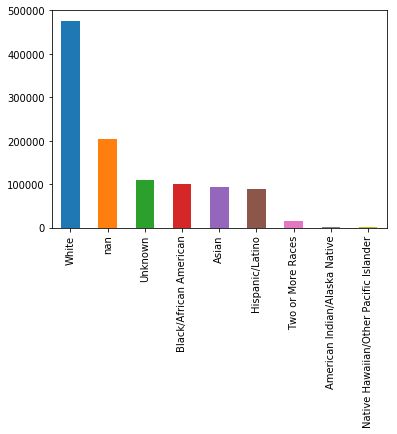

In [140]:
Ipeds.plot(kind='bar')

In [141]:
ETH = INNER_INT2[['ETH','IPEDS']]

In [142]:
ETH['IPEDS'].value_counts(dropna=False)

White                                     476594
NaN                                       203500
Unknown                                   108888
Black/African American                    100365
Asian                                      94074
Hispanic/Latino                            88426
Two or More Races                          15595
American Indian/Alaska Native               2123
Native Hawaiian/Other Pacific Islander       551
Name: IPEDS, dtype: int64

In [143]:
ETH['ETH'].isnull().sum()

203500

In [144]:
ETH.fillna({'ETH':'Unknown'},inplace=True)

In [145]:
ETH['ETH'].isnull().sum()

0

In [146]:
ETH['ETH'].value_counts(dropna=False)

Caucasian                                252715
WHITE                                    223879
Unknown                                  203500
Not specified                             87069
Hispanic                                  67778
Black/African American                    66485
Asian/Asian American/Pacific Islander     56370
ASIAN                                     37704
BLACK                                     33880
NSPEC                                     15883
Multi-Ethnic                              15595
Other                                      5230
SOAMER                                     5091
PUERTOR                                    3577
CENTAMER                                   3076
MEXAMER                                    2997
CUBAN                                      2986
HISPA                                      2544
American Indian/Alaskan Native             1717
NHISP                                       706
PACIF                                   

In [147]:
ETH.fillna({'IPEDS':'Unknown'},inplace=True)

In [148]:
ETH['IPEDS'].value_counts(dropna=False)

White                                     476594
Unknown                                   312388
Black/African American                    100365
Asian                                      94074
Hispanic/Latino                            88426
Two or More Races                          15595
American Indian/Alaska Native               2123
Native Hawaiian/Other Pacific Islander       551
Name: IPEDS, dtype: int64

In [149]:
Ipeds2 = ETH['IPEDS'].value_counts(dropna=False)

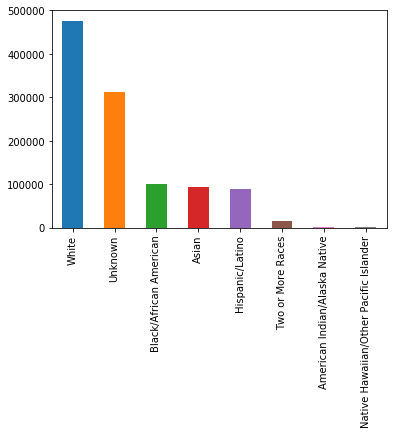

In [150]:
Ipeds2.plot(kind='bar')

In [151]:
INNER_INT2.columns

Index(['Contact_ID', 'Int_Name', 'Admit_Type', 'EMPLID', 'Ethnic_Group',
       'Ethnicity', 'Gender', 'Term', 'Lead_Source', 'Create_Date',
       'Mailing_Street', 'Mailing_City', 'Mailing_State', 'Mailing_Postal',
       'Mailing_Country', 'Other_City', 'Other_State', 'Other_Postal',
       'Mailing_Country', 'Market_Segment_Code', 'Market_Segment', 'OppName',
       'CONTerm', 'Record_Type', 'Inquiry', 'Inquiry_Date', 'Opp_ID', 'EMPL',
       'App_Number', 'YEAR', 'MONTH', 'NEW', 'ETH', 'IPEDS'],
      dtype='object')

In [152]:
INNER_INT2['Mailing_State'].value_counts()

FL                     322271
NY                      71971
NJ                      57974
CA                      57710
IL                      45077
TX                      43913
GA                      33190
PA                      30070
MA                      28435
NC                      28399
MD                      27775
OH                      25438
MI                      20997
VA                      19882
CT                      18425
TN                      18407
AL                      13275
MO                      11637
LA                      11148
MN                      10763
SC                      10677
CO                      10656
IN                       9504
WI                       8671
KY                       8138
AZ                       6617
WA                       6600
OK                       4834
UT                       4519
KS                       3996
                        ...  
Distrito nacional           1
Valle                       1
Catalonia 

In [153]:
INNER_INT2['Other_State'].value_counts()

FL                      105579
NY                       37115
NJ                       29450
CA                       19045
Florida                  13555
IL                       13436
MA                       12371
PA                       10539
MD                        9680
CT                        8699
TX                        7961
GA                        7682
VA                        5688
New York                  4653
OH                        4429
NC                        4196
MI                        4114
New Jersey                3032
Illinois                  2613
California                2597
TN                        2535
MO                        2503
CO                        2479
IN                        1820
RI                        1706
Maryland                  1583
Massachusetts             1564
PR                        1546
MN                        1499
WI                        1478
                         ...  
Leningradskaya               1
Gansushe

In [154]:
#from collections import Counter